# Resume:

1. [Titanic](https://www.kaggle.com/c/titanic) data frame 
2. data cleaning & brief EDA, data preprocessing
3. logistic regression model to predict whether passenger survived or not
4. features importance + metrics

# Main information:
1. the best model results are: accuracy = 0.82, precision = 0.83, recall = 0.82, f1-score = 0.82
2. with features: 'ticket_class', 'Sex', 'Age_scaled', 'numof_sibl/spous', 'numof_child/parent', 'status_Miss.', 'status_Mr.', 'status_Mrs.'
3. and model parametrs class_weight = {0:1, 1:2} and solver='newton-cg'
4. regularization is not nessesary there due to simplisity of the model.
5. the best way for filling missing values in age - fill with mean by sex(random with same dist. show less accuracy)
6. the best way of changing age - scaled age (standart scaling)

In [39]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pickle

In [1]:
# 1 data load

URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(URL)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 2 renaming

titanic_df.rename(columns={
    'Pclass': 'ticket_class',
    'SibSp': 'numof_sibl/spous',
    'Parch': 'numof_child/parent'
}, inplace=True)

In [3]:
# 3 get some info

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   ticket_class        891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 714 non-null    float64
 6   numof_sibl/spous    891 non-null    int64  
 7   numof_child/parent  891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Cabin               204 non-null    object 
 11  Embarked            889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# 4 make an auto profile 

titanic_df.profile_report()

In [4]:
# 5 delete cabin column because there are a lot of missing values

titanic_df = titanic_df.drop(columns='Cabin')

In [5]:
# 6 if there is missing values (all in row) - delete

titanic_df = titanic_df.dropna(how='all')
titanic_df

,PassengerId,Survived,ticket_class,Name,Sex,Age,numof_sibl/spous,numof_child/parent,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
# 7 change sex for binary option: 1 for female, 0 for male

titanic_df['Sex'] = titanic_df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
titanic_df.head()

,PassengerId,Survived,ticket_class,Name,Sex,Age,numof_sibl/spous,numof_child/parent,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


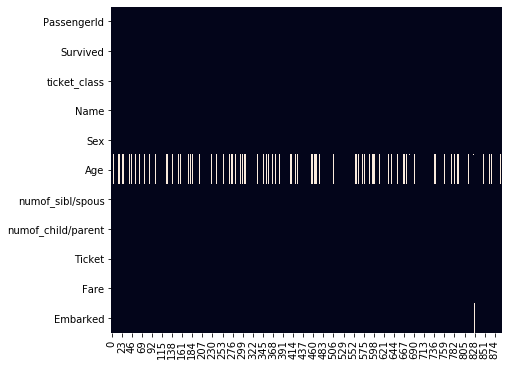

In [7]:
# 8 fill missing values in age - almost 20%

plt.figure(figsize=(7,6))
sns.heatmap(titanic_df.isnull().T, cbar=False)
plt.show()

In [8]:
# try two variants of filling the values
# first

age_mean = titanic_df['Age'].mean()
age_median = titanic_df['Age'].median()
age_std = titanic_df['Age'].std()

print(f'mean (expected value) for age is {age_mean: .3f}')
print(f'median (middle number in sorted column) is {age_median: .3f}') 
print(f'standart deviation (measure of the dispersion) is {age_std: .3f}')

mean (expected value) for age is  29.699
median (middle number in sorted column) is  28.000
standart deviation (measure of the dispersion) is  14.526


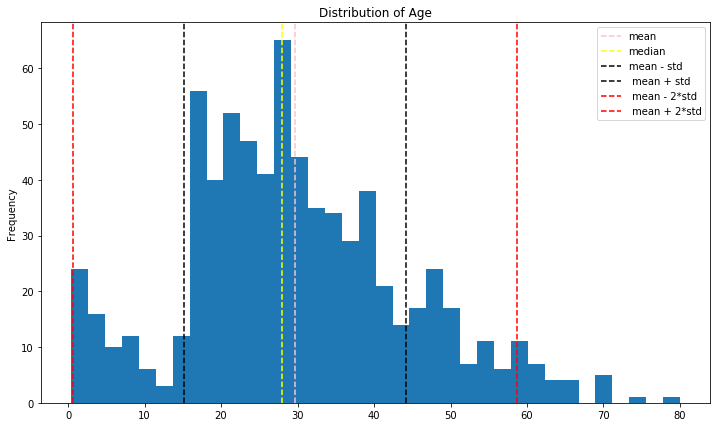

In [9]:
plt.figure(figsize=(12,7))
titanic_df['Age'].plot.hist(bins=36)

plt.axvline(age_mean, color='pink', linestyle='--')
plt.axvline(age_median, color='yellow', linestyle='--')
plt.axvline(age_mean - age_std, color='black', linestyle='--')
plt.axvline(age_mean + age_std, color='black', linestyle='--')
plt.axvline(age_mean - 2*age_std, color='red', linestyle='--')
plt.axvline(age_mean + 2*age_std, color='red', linestyle='--')
plt.title('Distribution of Age')
plt.legend(['mean', 'median', 'mean - std', ' mean + std', ' mean - 2*std', ' mean + 2*std'])

plt.show()

In [11]:
female_age_mean = round(titanic_df['Age'][titanic_df['Sex'] == 0].mean(),0) 
male_age_mean = round(titanic_df['Age'][titanic_df['Sex'] == 1].mean(),0)
print(f'age mean are: for males {male_age_mean: .3f}, for females {female_age_mean: .3f}')

age mean are: for males  28.000, for females  31.000


In [12]:

titanic_df.loc[(titanic_df['Age'].isnull()) & (titanic_df['Sex'] == 0), 'Age'] = male_age_mean
titanic_df.loc[(titanic_df['Age'].isnull()) & (titanic_df['Sex'] == 1), 'Age'] = female_age_mean
titanic_df

,PassengerId,Survived,ticket_class,Name,Sex,Age,numof_sibl/spous,numof_child/parent,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,31.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


In [439]:
#second - was rejected

# import numpy as np
# random_age = np.random.normal(
#     loc=titanic_df['Age'].mean(),
#     scale=titanic_df['Age'].std(),
#     size=titanic_df['Age'].isnull().sum())

# random_age=abs(random_age)
# titanic_df.loc[titanic_df['Age'].isnull(), 'Age'] = random_age
# titanic_df['Age'].hist(bins=35);

In [13]:
titanic_df['Age'].isnull().sum()

0

In [16]:
age_mean = titanic_df['Age'].mean()
age_median = titanic_df['Age'].median()
age_std = titanic_df['Age'].std()

print(f'mean (after making changes) for age is {age_mean: .3f}')
print(f'median (after making changes) is {age_median: .3f}') 
print(f'standart deviation (after making changes) is {age_std: .3f}')

mean (after making changes) for age is  29.540
median (after making changes) is  28.000
standart deviation (after making changes) is  13.020


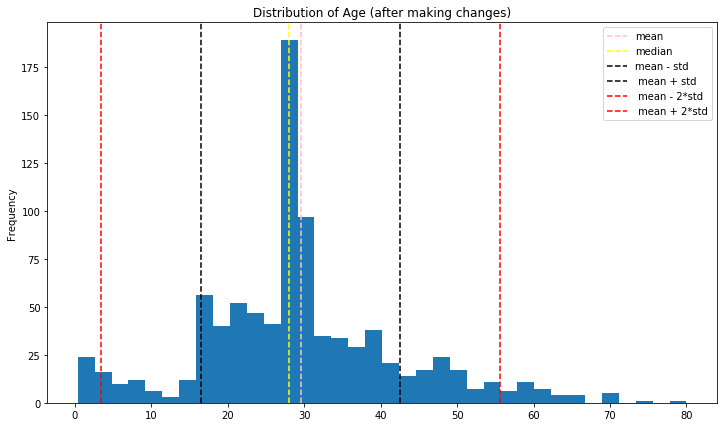

In [17]:
plt.figure(figsize=(12,7))
titanic_df['Age'].plot.hist(bins=36)

plt.axvline(age_mean, color='pink', linestyle='--')
plt.axvline(age_median, color='yellow', linestyle='--')
plt.axvline(age_mean - age_std, color='black', linestyle='--')
plt.axvline(age_mean + age_std, color='black', linestyle='--')
plt.axvline(age_mean - 2*age_std, color='red', linestyle='--')
plt.axvline(age_mean + 2*age_std, color='red', linestyle='--')
plt.title('Distribution of Age (after making changes)')
plt.legend(['mean', 'median', 'mean - std', ' mean + std', ' mean - 2*std', ' mean + 2*std'])

plt.show()

In [18]:
# 9 making categories for age to avoid outliers influence during analysis

titanic_df['Age_category'] = pd.qcut(titanic_df['Age'], 4).astype(str)
titanic_df['Age_category'].value_counts()

(22.0, 28.0]     255
(0.419, 22.0]    231
(35.0, 80.0]     217
(28.0, 35.0]     188
Name: Age_category, dtype: int64

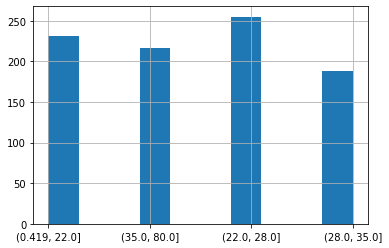

In [19]:
titanic_df['Age_category'].hist();

In [20]:
# 10 'ticket' column looks quite useless - drop it. the same for PassengerId

titanic_df = titanic_df.drop(columns='Ticket')
titanic_df = titanic_df.drop(columns='PassengerId')
titanic_df.head()

,Survived,ticket_class,Name,Sex,Age,numof_sibl/spous,numof_child/parent,Fare,Embarked,Age_category
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,"(0.419, 22.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,"(35.0, 80.0]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,"(22.0, 28.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,"(28.0, 35.0]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,"(28.0, 35.0]"


In [22]:
# 11 get some info from column 'name'

titanic_df['Status'] = titanic_df['Name'].apply(lambda x:x.split(', ')[1].split(' ')[0])
other = ['Master.', 'Dr.', 'Rev.', 'Col.', 'Major.', 'Mlle.', 'the', 'Jonkheer.', 'Mme.', 'Don.', 'Lady.', 'Capt.', 'Sir.', 'Ms.']
titanic_df['Status'] = titanic_df['Status'].apply(lambda x: 'Other' if x in other else x)   
titanic_df['Status'].value_counts()

Mr.      517
Miss.    182
Mrs.     125
Other     67
Name: Status, dtype: int64

In [23]:
#and one_hot encoding for status

status_df = pd.get_dummies(titanic_df['Status'], prefix='status', drop_first=False)
titanic_df = pd.concat([titanic_df, status_df], axis=1)
titanic_df = titanic_df.drop(columns='status_Other') 
titanic_df.head()

,Survived,ticket_class,Name,Sex,Age,numof_sibl/spous,numof_child/parent,Fare,Embarked,Age_category,Status,status_Miss.,status_Mr.,status_Mrs.
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,"(0.419, 22.0]",Mr.,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,"(35.0, 80.0]",Mrs.,0,0,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,"(22.0, 28.0]",Miss.,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,"(28.0, 35.0]",Mrs.,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,"(28.0, 35.0]",Mr.,0,1,0


In [24]:
# 12 we dont need colimn 'name' anymore

titanic_df = titanic_df.drop(columns='Name')
titanic_df.head()

,Survived,ticket_class,Sex,Age,numof_sibl/spous,numof_child/parent,Fare,Embarked,Age_category,Status,status_Miss.,status_Mr.,status_Mrs.
0,0,3,0,22.0,1,0,7.2500,S,"(0.419, 22.0]",Mr.,0,1,0
1,1,1,1,38.0,1,0,71.2833,C,"(35.0, 80.0]",Mrs.,0,0,1
2,1,3,1,26.0,0,0,7.9250,S,"(22.0, 28.0]",Miss.,1,0,0
3,1,1,1,35.0,1,0,53.1000,S,"(28.0, 35.0]",Mrs.,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,"(28.0, 35.0]",Mr.,0,1,0


In [25]:
# 13 also we can del the column 'Fare' because it connected with 'ticket_class' directly

titanic_df = titanic_df.drop(columns='Fare')
titanic_df.head()

,Survived,ticket_class,Sex,Age,numof_sibl/spous,numof_child/parent,Embarked,Age_category,Status,status_Miss.,status_Mr.,status_Mrs.
0,0,3,0,22.0,1,0,S,"(0.419, 22.0]",Mr.,0,1,0
1,1,1,1,38.0,1,0,C,"(35.0, 80.0]",Mrs.,0,0,1
2,1,3,1,26.0,0,0,S,"(22.0, 28.0]",Miss.,1,0,0
3,1,1,1,35.0,1,0,S,"(28.0, 35.0]",Mrs.,0,0,1
4,0,3,0,35.0,0,0,S,"(28.0, 35.0]",Mr.,0,1,0


In [26]:
# 14 make scaling for age

titanic_df['Age_scaled'] = titanic_df['Age'].apply(lambda x: (x-titanic_df['Age'].mean())/titanic_df['Age'].std())
titanic_df

,Survived,ticket_class,Sex,Age,numof_sibl/spous,numof_child/parent,Embarked,Age_category,Status,status_Miss.,status_Mr.,status_Mrs.,Age_scaled
0,0,3,0,22.0,1,0,S,"(0.419, 22.0]",Mr.,0,1,0,-0.579095
1,1,1,1,38.0,1,0,C,"(35.0, 80.0]",Mrs.,0,0,1,0.649748
2,1,3,1,26.0,0,0,S,"(22.0, 28.0]",Miss.,1,0,0,-0.271884
3,1,1,1,35.0,1,0,S,"(28.0, 35.0]",Mrs.,0,0,1,0.419340
4,0,3,0,35.0,0,0,S,"(28.0, 35.0]",Mr.,0,1,0,0.419340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,S,"(22.0, 28.0]",Other,0,0,0,-0.195082
887,1,1,1,19.0,0,0,S,"(0.419, 22.0]",Miss.,1,0,0,-0.809503
888,0,3,1,31.0,1,2,S,"(28.0, 35.0]",Miss.,1,0,0,0.112129
889,1,1,0,26.0,0,0,C,"(22.0, 28.0]",Mr.,0,1,0,-0.271884


In [29]:
# and we do not need 'age'

titanic_df = titanic_df.drop(columns='Age')
titanic_df.head()

,Survived,ticket_class,Sex,numof_sibl/spous,numof_child/parent,Embarked,Age_category,Status,status_Miss.,status_Mr.,status_Mrs.,Age_scaled,Age_encode
0,0,3,0,1,0,S,"(0.419, 22.0]",Mr.,0,1,0,-0.579095,0
1,1,1,1,1,0,C,"(35.0, 80.0]",Mrs.,0,0,1,0.649748,1
2,1,3,1,0,0,S,"(22.0, 28.0]",Miss.,1,0,0,-0.271884,2
3,1,1,1,1,0,S,"(28.0, 35.0]",Mrs.,0,0,1,0.419340,3
4,0,3,0,0,0,S,"(28.0, 35.0]",Mr.,0,1,0,0.419340,3


In [27]:
# 15 make encoding for age categories

def encode_labels(X, mapping=None):
    if mapping == None:
        list_values = X.unique()
        mapping = {i:g for (g, i) in enumerate(list_values)}
    return X.apply(lambda x: mapping[x]).astype('uint8')


titanic_df['Age_encode'] = encode_labels(titanic_df['Age_category'], mapping=None)
titanic_df

,Survived,ticket_class,Sex,Age,numof_sibl/spous,numof_child/parent,Embarked,Age_category,Status,status_Miss.,status_Mr.,status_Mrs.,Age_scaled,Age_encode
0,0,3,0,22.0,1,0,S,"(0.419, 22.0]",Mr.,0,1,0,-0.579095,0
1,1,1,1,38.0,1,0,C,"(35.0, 80.0]",Mrs.,0,0,1,0.649748,1
2,1,3,1,26.0,0,0,S,"(22.0, 28.0]",Miss.,1,0,0,-0.271884,2
3,1,1,1,35.0,1,0,S,"(28.0, 35.0]",Mrs.,0,0,1,0.419340,3
4,0,3,0,35.0,0,0,S,"(28.0, 35.0]",Mr.,0,1,0,0.419340,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,S,"(22.0, 28.0]",Other,0,0,0,-0.195082,2
887,1,1,1,19.0,0,0,S,"(0.419, 22.0]",Miss.,1,0,0,-0.809503,0
888,0,3,1,31.0,1,2,S,"(28.0, 35.0]",Miss.,1,0,0,0.112129,3
889,1,1,0,26.0,0,0,C,"(22.0, 28.0]",Mr.,0,1,0,-0.271884,2


In [24]:
# 16 make some analitics by features

In [30]:
corrmattix = titanic_df.corr().style.background_gradient(cmap="coolwarm")
corrmattix

,Survived,ticket_class,Sex,numof_sibl/spous,numof_child/parent,status_Miss.,status_Mr.,status_Mrs.,Age_scaled,Age_encode
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.327093,-0.549199,0.339040,-0.056577,0.009454
ticket_class,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.000576,0.142698,-0.149209,-0.334728,-0.005492
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.686808,-0.867334,0.547600,-0.062569,0.019475
numof_sibl/spous,-0.035322,0.083081,0.114631,1.000000,0.414838,0.087932,-0.250489,0.063407,-0.227819,-0.111375
numof_child/parent,0.081629,0.018443,0.245489,0.414838,1.000000,0.105567,-0.333905,0.225852,-0.172866,-0.210444
status_Miss.,0.327093,-0.000576,0.686808,0.087932,0.105567,1.000000,-0.595692,-0.204670,-0.231314,-0.078428
status_Mr.,-0.549199,0.142698,-0.867334,-0.250489,-0.333905,-0.595692,1.000000,-0.474952,0.164676,0.091602
status_Mrs.,0.339040,-0.149209,0.547600,0.063407,0.225852,-0.204670,-0.474952,1.000000,0.176695,0.109363
Age_scaled,-0.056577,-0.334728,-0.062569,-0.227819,-0.172866,-0.231314,0.164676,0.176695,1.000000,0.274731
Age_encode,0.009454,-0.005492,0.019475,-0.111375,-0.210444,-0.078428,0.091602,0.109363,0.274731,1.000000


In [26]:
# we can see than survived value is conncted with sex mostly (0.543351), status and ticket class

In [29]:
# 17 Build a logistic regression model to predict whether passenger survived or not

In [32]:
y = titanic_df['Survived']
X = titanic_df[['ticket_class', 'Sex', 'Age_scaled','Age_encode', 'numof_sibl/spous', 'numof_child/parent', 'status_Miss.', 'status_Mr.', 'status_Mrs.']] 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
class_weight = {0:1, 1:2}
model = LogisticRegression(class_weight = class_weight,solver='newton-cg')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = model.predict(x_test)

In [36]:
accuracy_score(y_test, y_pred)

0.8156424581005587

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       105
           1       0.74      0.86      0.80        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179



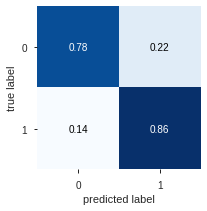

In [38]:
CM = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=CM, figsize=(3, 3), show_absolute=False, show_normed=True)

In [ ]:
# 18 safe to pickle

filename = 'finalized_model.sav'
pickle.dump(model_4, open(filename, 'wb'))